<a href="https://colab.research.google.com/github/kanakhan/GMSW/blob/main/%EC%A7%91%EA%B3%84%ED%95%A8%EC%88%98_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 집계(aggregatation) 함수



* 집계(aggregation) 함수는 행(row)들이 가지고 있는 하나의 값들을 그룹별로 합쳐 평균, 표준편차 등 단일 요약 값 및 대표값 을 형성하는 방법




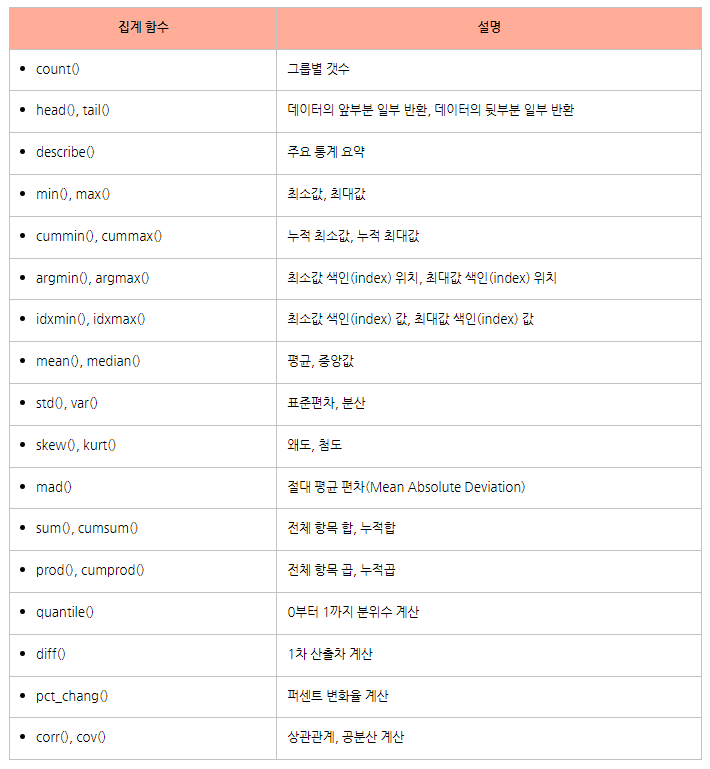

#### 타이타닉(titanic) 데이터 불러오기: load_dataset()

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')

#### 타이타닉(titanic) 데이터 확인: head(), tail()

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


#### 타이타닉(titanic) 데이터 탐색: 집계 함수 사용

In [5]:
titanic.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [6]:
titanic.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


survived       0.486592
pclass         0.836071
age           14.526497
sibsp          1.102743
parch          0.806057
fare          49.693429
adult_male     0.489615
alone          0.489615
dtype: float64

In [7]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


## 2. groupby() 연산



*   데이터를 특정 기준으로 그룹핑해 그룹별로 평균, 표준편차 등 집계값이나 대표값을 구하고자 할 때 groupby() 함수를 사용




* 하나의 칼럼을 기준으로 나머지 칼럼의 집계 값: df.groupby('칼럼1).집계함수()
* 질문) 객실 등급(pclass) 별로 나머지 칼럼(변수)들의 빈도는 어떻게 되는가?


In [8]:
titanic.groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


* 특정 칼럼에 대해 다른 칼럼의 집계 값:  df.groupby('칼럼1')['칼럼2'].집계함수
* 질문) 남성, 여성, 아이들(who)의 생존자('survived') 수와 그 비율은 어떻게 되는가?

In [10]:
titanic.groupby('who')['survived'].agg(['count','mean'])

,count,mean
who,,
child,83,0.590361
man,537,0.163873
woman,271,0.756458


* 여러 칼럼(이중 그룹)에 대한 특정 칼럼의 집계 값: df.groupby(['칼럼1]', ['칼럼2'])['칼럼3'].집계함수()
* 질문) 객실등급('pclass')과 동행여부('alone') 별로 생존비율('survived')은 어떻게 되는가?

In [11]:
titanic.groupby(['class','alone'])['survived'].mean()

class   alone
First   False    0.728972
        True     0.532110
Second  False    0.637500
        True     0.346154
Third   False    0.299401
        True     0.212963
Name: survived, dtype: float64

* stack()과 unstack()

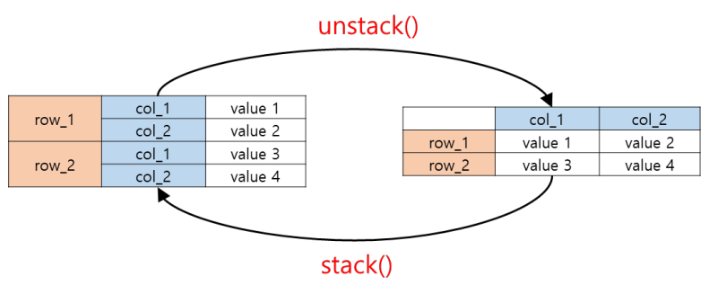

In [12]:
titanic.groupby(['class','alone'])['survived'].mean().unstack()

alone,False,True
class,,
First,0.728972,0.532110
Second,0.637500,0.346154
Third,0.299401,0.212963


# 3. query() 함수



* query() 함수는 데이터프래임에서 조건에 맞는 데이터를 가져오는 함수

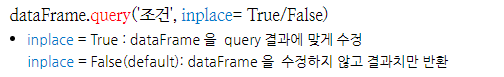

* query() 함수를 이용해 조건에 맞는 데이터를 가져와 그룹별로 나누고 집계함수를 메소드로 사용하면 보다 자세한 집계 값을 구할 수 있다

* (질문) 나이가 60세('age') 이상인 사람들 중 객실 등급('pclass')별 생존률('survived')을 어떻게 되는가?